In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("laptop_data.csv")
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [5]:
df.duplicated().sum()

0

In [6]:
df.isnull().sum()

,0
Unnamed: 0,0
Company,0
TypeName,0
Inches,0
ScreenResolution,0
Cpu,0
Ram,0
Memory,0
Gpu,0
OpSys,0


In [7]:
df.drop(columns = "Unnamed: 0",inplace = True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


In [9]:
df["Ram"] = df["Ram"].str.replace("GB","")
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [10]:
df["Weight"] = df["Weight"].str.replace("kg","")

In [11]:
df.tail()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.8,33992.64
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.3,79866.72
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5,12201.12
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.92
1302,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4,500GB HDD,Intel HD Graphics,Windows 10,2.2,19660.32


<ipython-input-12-f3df1b3eaeb0>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Price"])


<Axes: xlabel='Price', ylabel='Density'>

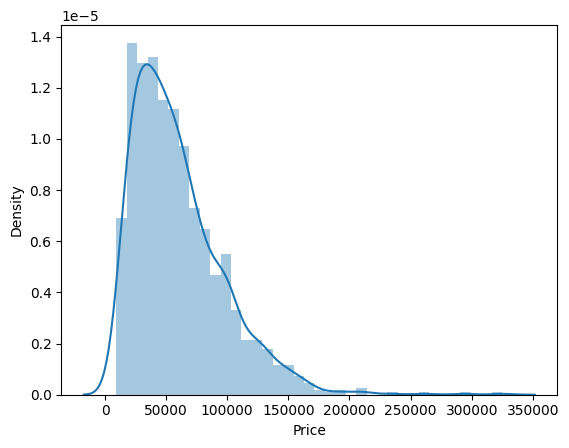

In [12]:
# this is left skewed data
sns.distplot(df["Price"])

<Axes: xlabel='Company'>

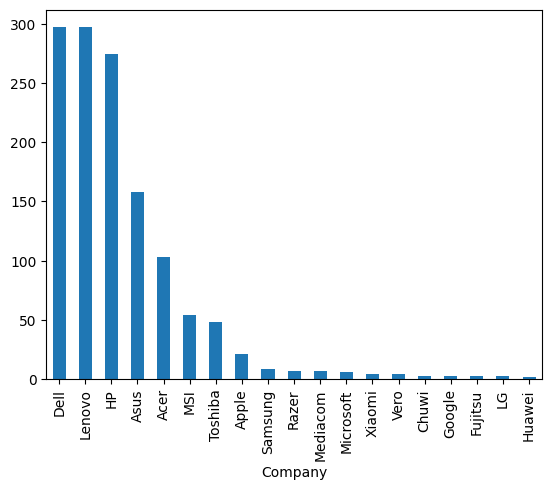

In [13]:
df["Company"].value_counts().plot(kind="bar")

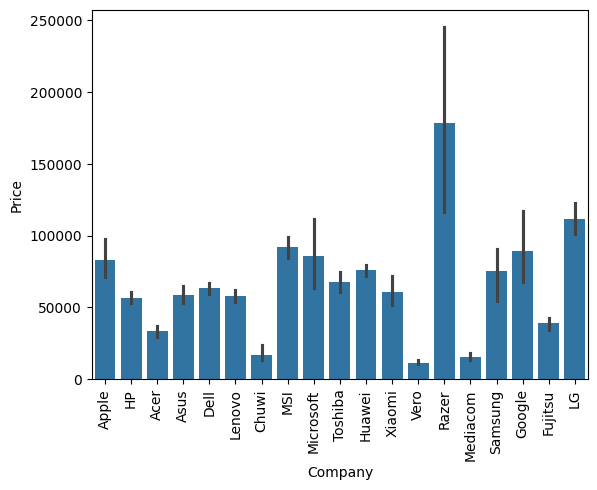

In [14]:
sns.barplot(x = df["Company"],y=df["Price"])
plt.xticks(rotation = "vertical")
plt.show()

In [15]:
df["TypeName"].value_counts()

,count
TypeName,
Notebook,727
Gaming,205
Ultrabook,196
2 in 1 Convertible,121
Workstation,29
Netbook,25


<Axes: xlabel='TypeName'>

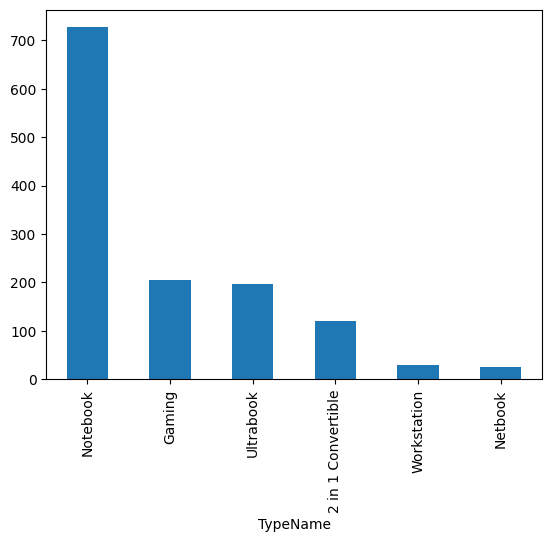

In [16]:
df["TypeName"].value_counts().plot(kind = "bar")

<Axes: xlabel='TypeName', ylabel='Price'>

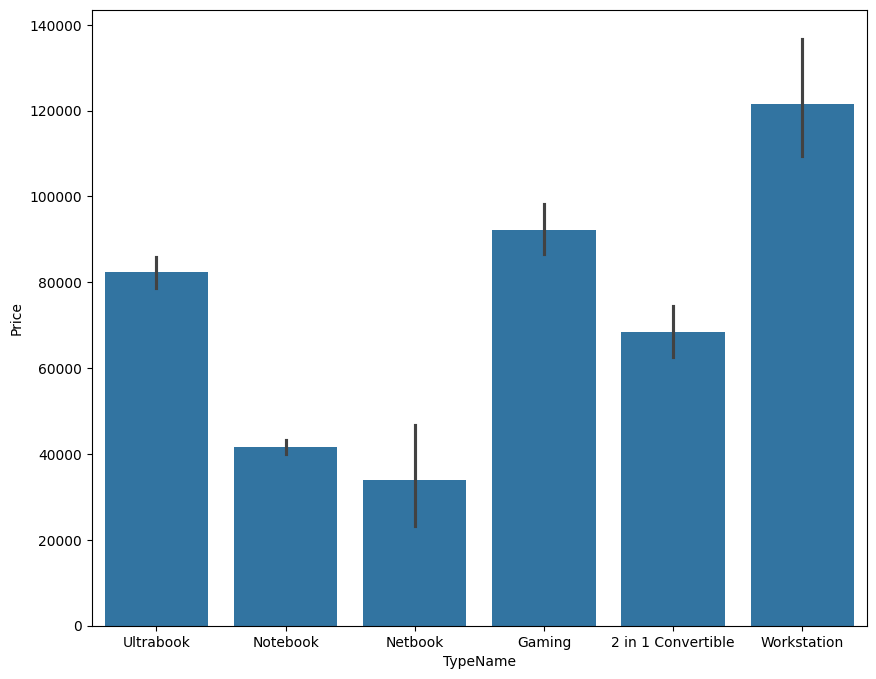

In [17]:
plt.figure(figsize = (10,8))
sns.barplot(x = df["TypeName"],y = df["Price"])

<ipython-input-18-aebe96d9c819>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Inches"])


<Axes: xlabel='Inches', ylabel='Density'>

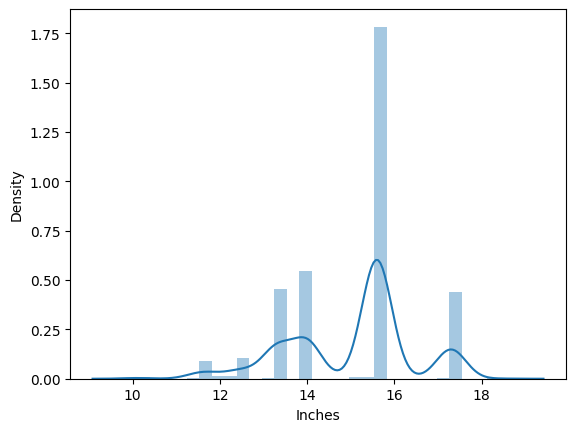

In [18]:
sns.distplot(df["Inches"])

<Axes: xlabel='Inches'>

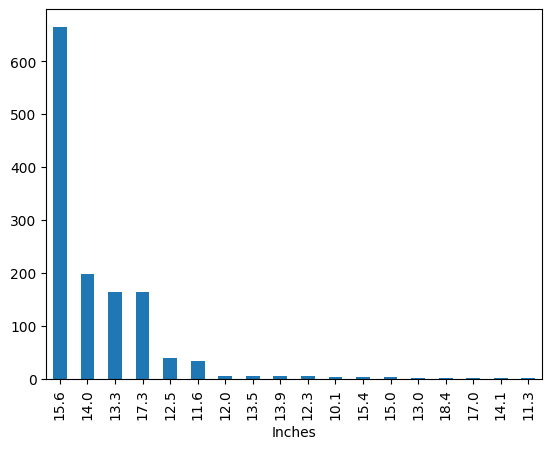

In [19]:
df["Inches"].value_counts().plot(kind = "bar")

In [20]:
df["ScreenResolution"].value_counts()

,count
ScreenResolution,
Full HD 1920x1080,507
1366x768,281
IPS Panel Full HD 1920x1080,230
IPS Panel Full HD / Touchscreen 1920x1080,53
Full HD / Touchscreen 1920x1080,47
1600x900,23
Touchscreen 1366x768,16
Quad HD+ / Touchscreen 3200x1800,15
IPS Panel 4K Ultra HD 3840x2160,12


In [21]:
df["display_size"] = df["ScreenResolution"].str.split().str[-1]
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,display_size
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,2560x1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,1440x900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,1920x1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,2880x1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,2560x1600


In [22]:
df["x_res"] = df["display_size"].str.split("x").str.get(0)
df["y_res"] = df["display_size"].str.split("x").str.get(1)

In [23]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,display_size,x_res,y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,2560x1600,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,1440x900,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,1920x1080,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,2880x1800,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,2560x1600,2560,1600


In [24]:
df["touch_screen"] = df["ScreenResolution"].apply(lambda x : 1 if "Touchscreen" in x else 0)

In [25]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,display_size,x_res,y_res,touch_screen
1247,Asus,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,2.34,123876.000,1920x1080,1920,1080,0
1160,Lenovo,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 6600U 2.6GHz,8,256GB SSD,Intel HD Graphics 520,Windows 7,1.7,79866.720,1920x1080,1920,1080,0
721,HP,2 in 1 Convertible,13.3,IPS Panel Touchscreen 1366x768,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.58,44574.048,1366x768,1366,768,1
1096,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,1TB HDD,AMD Radeon R7 M445,Windows 10,2.36,34035.264,1920x1080,1920,1080,0
958,Dell,Ultrabook,13.3,Quad HD+ 3200x1800,Intel Core i7 6500U 2.5GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.3,67559.040,3200x1800,3200,1800,0


In [26]:
df["Ips"] = df["ScreenResolution"].apply(lambda x : 1 if "IPS" in x else 0)

In [27]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,display_size,x_res,y_res,touch_screen,Ips
1265,Lenovo,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8,1TB HDD,Nvidia GeForce GTX 960M,Windows 10,2.6,47898.72,1920x1080,1920,1080,0,1
961,Lenovo,Ultrabook,12.5,IPS Panel Full HD 1920x1080,Intel Core i5 7300U 2.6GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.36,93772.80,1920x1080,1920,1080,0,1
472,Google,Ultrabook,12.3,Touchscreen 2400x1600,Intel Core i5 7Y57 1.2GHz,8,128GB SSD,Intel HD Graphics 615,Chrome OS,1.1,67932.00,2400x1600,2400,1600,1,0
121,MSI,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 2TB HDD,Nvidia GeForce GTX 1070,Windows 10,1.8,119427.12,1920x1080,1920,1080,0,0
244,Lenovo,2 in 1 Convertible,13.9,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.38,57489.12,1920x1080,1920,1080,1,1


<Axes: xlabel='touch_screen'>

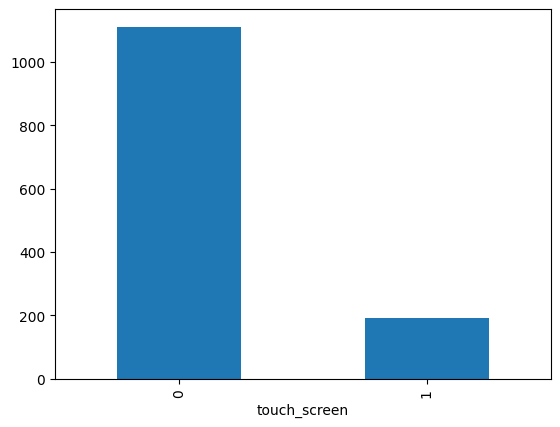

In [28]:
df["touch_screen"].value_counts().plot(kind="bar")

<Axes: xlabel='Ips'>

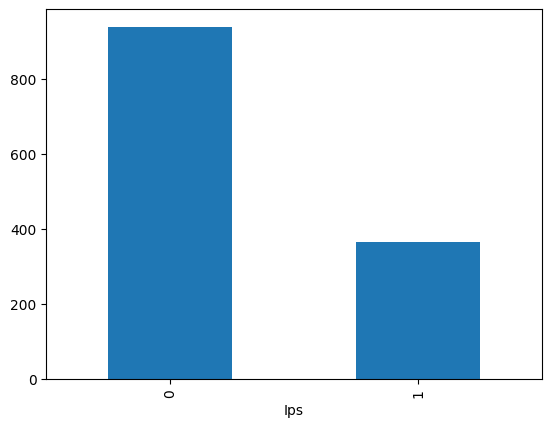

In [29]:
df["Ips"].value_counts().plot(kind="bar")

<Axes: xlabel='Ips', ylabel='Price'>

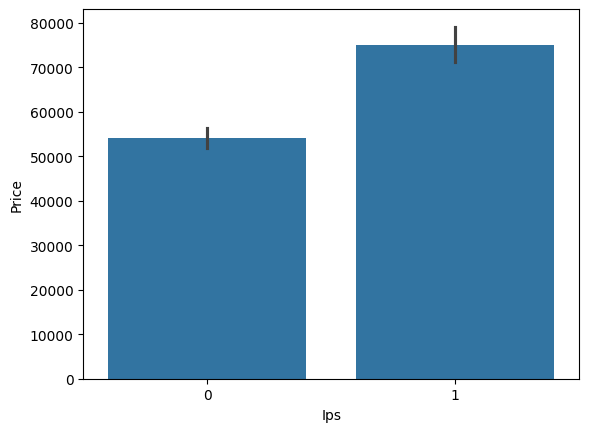

In [30]:
sns.barplot(x = df["Ips"],y=df["Price"])


<Axes: xlabel='touch_screen', ylabel='Price'>

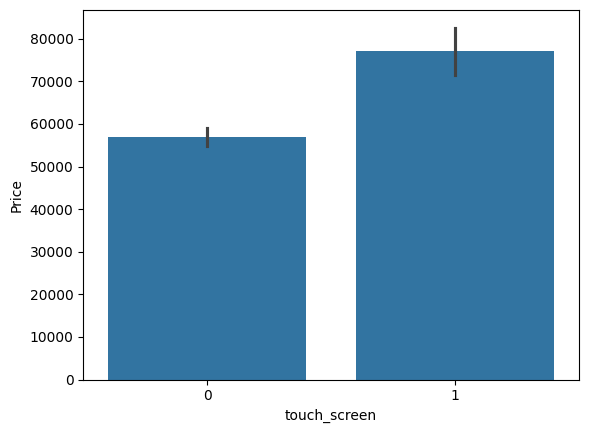

In [31]:
sns.barplot(x=df["touch_screen"],y=df["Price"])

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
 11  display_size      1303 non-null   object 
 12  x_res             1303 non-null   object 
 13  y_res             1303 non-null   object 
 14  touch_screen      1303 non-null   int64  
 15  Ips               1303 non-null   int64  
dtypes: float64(2), int64(2), object(12)
memory

In [33]:
df["x_res"] = df["x_res"].astype("int")
df["y_res"] = df["y_res"].astype("int")

In [34]:
df["Weight"] = df["Weight"].astype("float")
df["Ram"] = df["Ram"].astype("float")

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   float64
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   float64
 11  display_size      1303 non-null   object 
 12  x_res             1303 non-null   int64  
 13  y_res             1303 non-null   int64  
 14  touch_screen      1303 non-null   int64  
 15  Ips               1303 non-null   int64  
dtypes: float64(4), int64(4), object(8)
memory 

In [36]:
df["Ppi"] =( df["x_res"]**2+df["y_res"]**2)*0.5/df["Inches"].astype("int")

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   float64
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   float64
 11  display_size      1303 non-null   object 
 12  x_res             1303 non-null   int64  
 13  y_res             1303 non-null   int64  
 14  touch_screen      1303 non-null   int64  
 15  Ips               1303 non-null   int64  
 16  Ppi               1303 non-null   float64


In [38]:
df.corr(numeric_only = True)["Price"].sort_values(ascending= False)

,Price
Price,1.000000
Ram,0.743007
x_res,0.556529
y_res,0.552809
Ppi,0.474759
Ips,0.252208
Weight,0.210370
touch_screen,0.191226
Inches,0.068197


In [39]:
df.drop(columns = ["x_res","y_res","Inches"],inplace=True)

In [40]:
df.head()

,Company,TypeName,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,display_size,touch_screen,Ips,Ppi
0,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,2560x1600,0,1,350523.076923
1,Apple,Ultrabook,1440x900,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,1440x900,0,0,110907.692308
2,HP,Notebook,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,1920x1080,0,0,161760.000000
3,Apple,Ultrabook,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16.0,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,2880x1800,0,1,384480.000000
4,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,2560x1600,0,1,350523.076923


In [41]:
df["Price"] = df["Price"].astype("int")

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   ScreenResolution  1303 non-null   object 
 3   Cpu               1303 non-null   object 
 4   Ram               1303 non-null   float64
 5   Memory            1303 non-null   object 
 6   Gpu               1303 non-null   object 
 7   OpSys             1303 non-null   object 
 8   Weight            1303 non-null   float64
 9   Price             1303 non-null   int64  
 10  display_size      1303 non-null   object 
 11  touch_screen      1303 non-null   int64  
 12  Ips               1303 non-null   int64  
 13  Ppi               1303 non-null   float64
dtypes: float64(3), int64(3), object(8)
memory usage: 142.6+ KB


In [43]:
df.drop(columns="display_size",inplace=True)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   ScreenResolution  1303 non-null   object 
 3   Cpu               1303 non-null   object 
 4   Ram               1303 non-null   float64
 5   Memory            1303 non-null   object 
 6   Gpu               1303 non-null   object 
 7   OpSys             1303 non-null   object 
 8   Weight            1303 non-null   float64
 9   Price             1303 non-null   int64  
 10  touch_screen      1303 non-null   int64  
 11  Ips               1303 non-null   int64  
 12  Ppi               1303 non-null   float64
dtypes: float64(3), int64(3), object(7)
memory usage: 132.5+ KB


In [45]:
df.head()

,Company,TypeName,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,touch_screen,Ips,Ppi
0,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378,0,1,350523.076923
1,Apple,Ultrabook,1440x900,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895,0,0,110907.692308
2,HP,Notebook,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636,0,0,161760.000000
3,Apple,Ultrabook,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16.0,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195,0,1,384480.000000
4,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095,0,1,350523.076923


In [46]:
# feature engineering in cpu
df["Cpu"].value_counts()

,count
Cpu,
Intel Core i5 7200U 2.5GHz,190
Intel Core i7 7700HQ 2.8GHz,146
Intel Core i7 7500U 2.7GHz,134
Intel Core i7 8550U 1.8GHz,73
Intel Core i5 8250U 1.6GHz,72
...,...
Intel Core M M3-6Y30 0.9GHz,1
AMD A9-Series 9420 2.9GHz,1
Intel Core i3 6006U 2.2GHz,1


In [47]:
df["cpu Name"] = df["Cpu"].apply(lambda x:" ".join(x.split()[:3]))

In [48]:
df.head()

,Company,TypeName,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,touch_screen,Ips,Ppi,cpu Name
0,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378,0,1,350523.076923,Intel Core i5
1,Apple,Ultrabook,1440x900,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895,0,0,110907.692308,Intel Core i5
2,HP,Notebook,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636,0,0,161760.000000,Intel Core i5
3,Apple,Ultrabook,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16.0,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195,0,1,384480.000000,Intel Core i7
4,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095,0,1,350523.076923,Intel Core i5


In [49]:
df["cpu Name"].value_counts()

,count
cpu Name,
Intel Core i7,527
Intel Core i5,423
Intel Core i3,136
Intel Celeron Dual,80
Intel Pentium Quad,27
Intel Core M,19
AMD A9-Series 9420,12
Intel Celeron Quad,8
AMD A6-Series 9220,8


In [50]:
df = df[df["cpu Name"] != "Samsung Cortex A72&A53"]

In [51]:
df["cpu Name"].value_counts()

,count
cpu Name,
Intel Core i7,527
Intel Core i5,423
Intel Core i3,136
Intel Celeron Dual,80
Intel Pentium Quad,27
Intel Core M,19
AMD A9-Series 9420,12
Intel Celeron Quad,8
AMD A6-Series 9220,8


In [52]:
def fatch_processor(name):
    if name=="Intel Core i7" or name=="Intel Core i5" or name=="Intel Core i3":
        return name
    elif name.split()[0] == "Intel":
        return "other Intel processor"
    else:
        return "AMD processor"

In [53]:
df["cpu brand"] = df["cpu Name"].apply(fatch_processor)

In [54]:
df.sample(5)

,Company,TypeName,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,touch_screen,Ips,Ppi,cpu Name,cpu brand
503,Lenovo,Notebook,1366x768,Intel Celeron Dual Core N3350 1.1GHz,4.0,500GB HDD,Intel HD Graphics 500,Windows 10,2.10,15930,0,0,87706.428571,Intel Celeron Dual,other Intel processor
5,Acer,Notebook,1366x768,AMD A9-Series 9420 3GHz,4.0,500GB HDD,AMD Radeon R5,Windows 10,2.10,21312,0,0,81859.333333,AMD A9-Series 9420,AMD processor
1084,Dell,Notebook,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel HD Graphics 620,Windows 10,2.18,39960,0,0,161760.000000,Intel Core i5,Intel Core i5
679,Acer,Gaming,Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,16.0,256GB SSD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.50,69210,0,0,161760.000000,Intel Core i5,Intel Core i5
219,Dell,2 in 1 Convertible,Full HD / Touchscreen 1920x1080,Intel Core i7 8550U 1.8GHz,16.0,512GB SSD,Intel UHD Graphics 620,Windows 10,1.62,68145,1,0,186646.153846,Intel Core i7,Intel Core i7


In [55]:
df["cpu brand"].value_counts()

,count
cpu brand,
Intel Core i7,527
Intel Core i5,423
other Intel processor,154
Intel Core i3,136
AMD processor,62


<Axes: xlabel='cpu brand'>

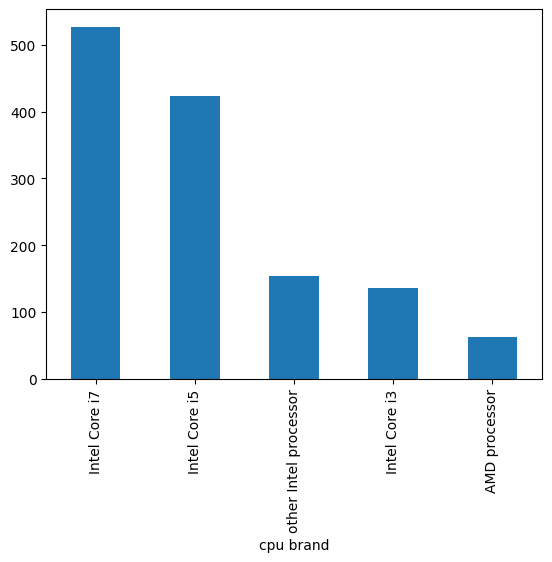

In [56]:
df["cpu brand"].value_counts().plot(kind="bar")

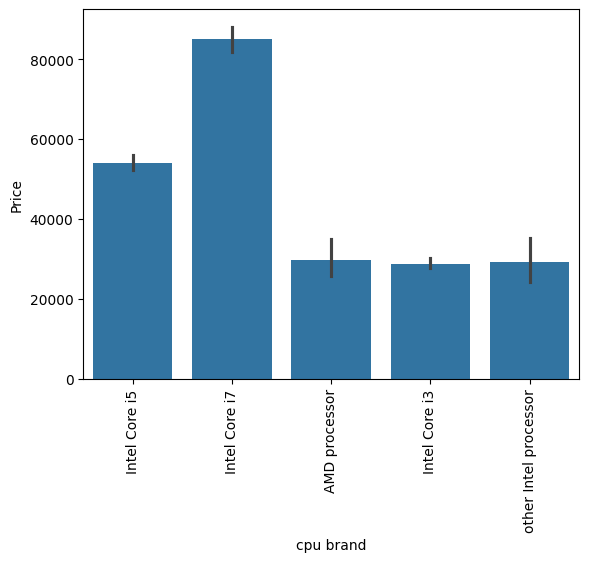

In [58]:
sns.barplot(x = df["cpu brand"],y = df["Price"])
plt.xticks(rotation="vertical")
plt.show()

In [59]:
df.drop(columns = ["Cpu","cpu Name", "ScreenResolution"],inplace = True)

In [60]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,touch_screen,Ips,Ppi,cpu brand
0,Apple,Ultrabook,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378,0,1,350523.076923,Intel Core i5
1,Apple,Ultrabook,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895,0,0,110907.692308,Intel Core i5
2,HP,Notebook,8.0,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636,0,0,161760.000000,Intel Core i5
3,Apple,Ultrabook,16.0,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195,0,1,384480.000000,Intel Core i7
4,Apple,Ultrabook,8.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095,0,1,350523.076923,Intel Core i5


In [61]:
# Now feature engineering and eda in memory column
df.Memory.value_counts()

,count
Memory,
256GB SSD,412
1TB HDD,223
500GB HDD,132
512GB SSD,118
128GB SSD + 1TB HDD,94
128GB SSD,76
256GB SSD + 1TB HDD,73
32GB Flash Storage,37
2TB HDD,16


<Axes: xlabel='Memory'>

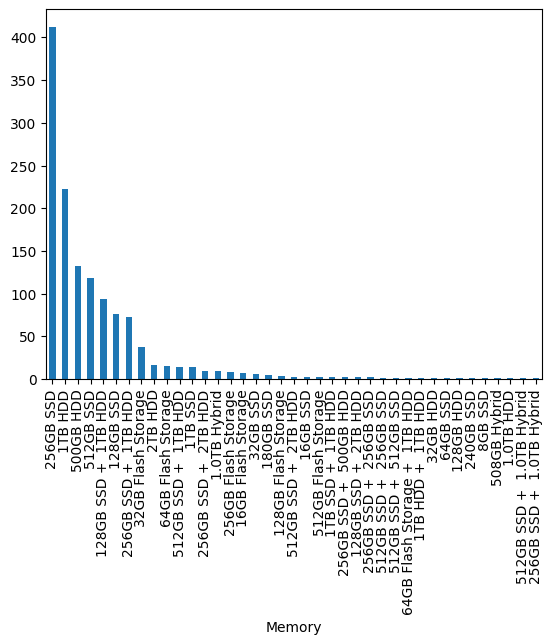

In [62]:
df.Memory.value_counts().plot(kind="bar")

In [63]:
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')
new = df["Memory"].str.split("+", n = 1, expand = True)

df["first"]= new[0]
df["first"]=df["first"].str.strip()

df["second"]= new[1]

df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['first'] = df['first'].str.replace(r'\D', '')

df["second"].fillna("0", inplace = True)

df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['second'] = df['second'].str.replace(r'\D', '')

df["first"] = df["first"].apply(lambda x : int(x.split()[0]))
# df["first"] = df["first"].astype(int)
# df["second"] = df["second"].astype(int)
df["second"] = df["second"].apply(lambda x : int(x.split()[0]))

df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

<ipython-input-63-bff875be0c95>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["second"].fillna("0", inplace = True)


In [64]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,touch_screen,Ips,Ppi,cpu brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8.0,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378,0,1,350523.076923,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8.0,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895,0,0,110907.692308,Intel Core i5,0,0,0,128
2,HP,Notebook,8.0,256 SSD,Intel HD Graphics 620,No OS,1.86,30636,0,0,161760.000000,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16.0,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195,0,1,384480.000000,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8.0,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095,0,1,350523.076923,Intel Core i5,0,256,0,0


In [65]:
df.corr(numeric_only = True)["Price"]

,Price
Ram,0.742905
Weight,0.209867
Price,1.000000
touch_screen,0.192917
Ips,0.253319
Ppi,0.475969
HDD,-0.096892
SSD,0.670660
Hybrid,0.007942
Flash_Storage,-0.040067


In [66]:
df.drop(columns = ["Hybrid","Flash_Storage"],inplace=True)

In [67]:
df.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,touch_screen,Ips,Ppi,cpu brand,HDD,SSD
471,HP,Notebook,8.0,500 HDD,AMD FirePro W4190M,Windows 10,1.90,61485,0,0,161760.000000,Intel Core i5,500,0
1262,Dell,Notebook,6.0,1000 HDD,Intel HD Graphics 620,Windows 10,2.30,24455,0,0,81859.333333,Intel Core i3,1000,0
980,Dell,2 in 1 Convertible,12.0,512 SSD,Intel HD Graphics 620,Windows 10,2.19,69210,1,1,161760.000000,Intel Core i7,0,512
863,Lenovo,Gaming,8.0,1000 HDD,Nvidia GeForce GTX 1050,No OS,2.50,54185,0,1,161760.000000,Intel Core i5,1000,0
113,HP,Notebook,4.0,500 HDD,Intel UHD Graphics 620,Windows 10,1.63,38468,0,1,87706.428571,Intel Core i5,500,0


In [ ]:
df.drop(columns = ["Memory"],inplace=True)

In [71]:
# now feature engineering on GPU column
df.Gpu.value_counts()

,count
Gpu,
Intel HD Graphics 620,281
Intel HD Graphics 520,185
Intel UHD Graphics 620,68
Nvidia GeForce GTX 1050,66
Nvidia GeForce GTX 1060,48
...,...
Intel Graphics 620,1
AMD Radeon R5 520,1
AMD Radeon R7,1


In [72]:
df["Graphic"] = df["Gpu"].apply(lambda x : x.split()[0])

In [73]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,touch_screen,Ips,Ppi,cpu brand,HDD,SSD,Graphic
0,Apple,Ultrabook,8.0,Intel Iris Plus Graphics 640,macOS,1.37,71378,0,1,350523.076923,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8.0,Intel HD Graphics 6000,macOS,1.34,47895,0,0,110907.692308,Intel Core i5,0,0,Intel
2,HP,Notebook,8.0,Intel HD Graphics 620,No OS,1.86,30636,0,0,161760.000000,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16.0,AMD Radeon Pro 455,macOS,1.83,135195,0,1,384480.000000,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8.0,Intel Iris Plus Graphics 650,macOS,1.37,96095,0,1,350523.076923,Intel Core i5,0,256,Intel


In [74]:
df.Graphic.value_counts()

,count
Graphic,
Intel,722
Nvidia,400
AMD,180


<Axes: xlabel='Graphic'>

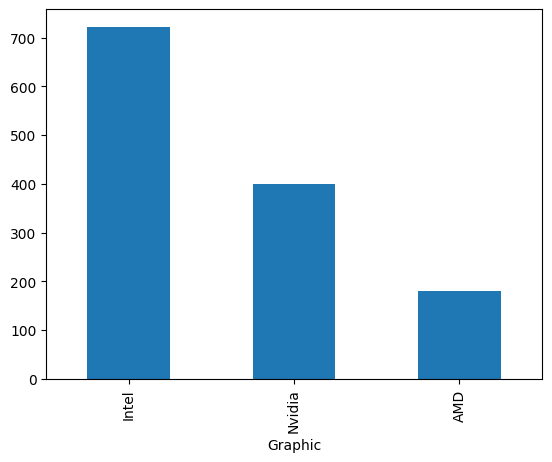

In [75]:
df.Graphic.value_counts().plot(kind="bar")

<Axes: xlabel='Graphic', ylabel='Price'>

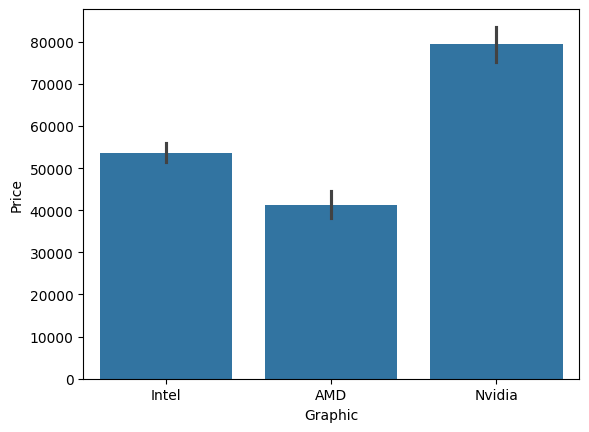

In [76]:
sns.barplot(x = df["Graphic"],y=df["Price"])

In [77]:
df.drop(columns="Gpu",inplace=True)

In [78]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,touch_screen,Ips,Ppi,cpu brand,HDD,SSD,Graphic
0,Apple,Ultrabook,8.0,macOS,1.37,71378,0,1,350523.076923,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8.0,macOS,1.34,47895,0,0,110907.692308,Intel Core i5,0,0,Intel
2,HP,Notebook,8.0,No OS,1.86,30636,0,0,161760.000000,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16.0,macOS,1.83,135195,0,1,384480.000000,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8.0,macOS,1.37,96095,0,1,350523.076923,Intel Core i5,0,256,Intel


In [80]:
# now feature engineering and EDA in ram column
df.Ram.value_counts()

,count
Ram,
8.0,619
4.0,374
16.0,200
6.0,41
12.0,25
2.0,22
32.0,17
24.0,3
64.0,1


<Axes: xlabel='Ram'>

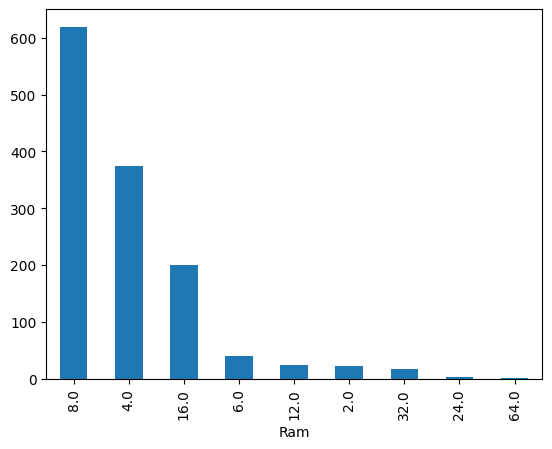

In [81]:
df.Ram.value_counts().plot(kind="bar")

<Axes: xlabel='Ram', ylabel='Price'>

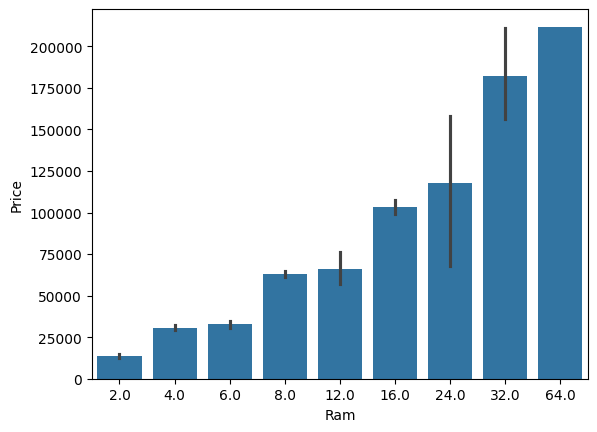

In [82]:
sns.barplot(x=df["Ram"],y=df["Price"])

In [83]:
df["Ram"] = df["Ram"].apply(lambda x : int(x))

In [84]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,touch_screen,Ips,Ppi,cpu brand,HDD,SSD,Graphic
0,Apple,Ultrabook,8,macOS,1.37,71378,0,1,350523.076923,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895,0,0,110907.692308,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,30636,0,0,161760.000000,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195,0,1,384480.000000,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095,0,1,350523.076923,Intel Core i5,0,256,Intel


In [85]:
# now on OpSys
df.OpSys.value_counts()

,count
OpSys,
Windows 10,1072
No OS,66
Linux,62
Windows 7,45
Chrome OS,26
macOS,13
Mac OS X,8
Windows 10 S,8
Android,2


In [86]:
def fatch_os(name):
    if name == "Windows 10" or name == "Windows 11" or name == "Windows 7" or name == "Windows 10 S":
        return "Windows"
    elif name == "macOS"  or name =="Mac OS X":
        return "Mac"
    elif name=="Linux":
        return name
    else:
        return "other"

In [87]:
df["OS"] = df["OpSys"].apply(fatch_os)

In [88]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,touch_screen,Ips,Ppi,cpu brand,HDD,SSD,Graphic,OS
0,Apple,Ultrabook,8,macOS,1.37,71378,0,1,350523.076923,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,macOS,1.34,47895,0,0,110907.692308,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,No OS,1.86,30636,0,0,161760.000000,Intel Core i5,0,256,Intel,other
3,Apple,Ultrabook,16,macOS,1.83,135195,0,1,384480.000000,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,macOS,1.37,96095,0,1,350523.076923,Intel Core i5,0,256,Intel,Mac


<Axes: xlabel='OS'>

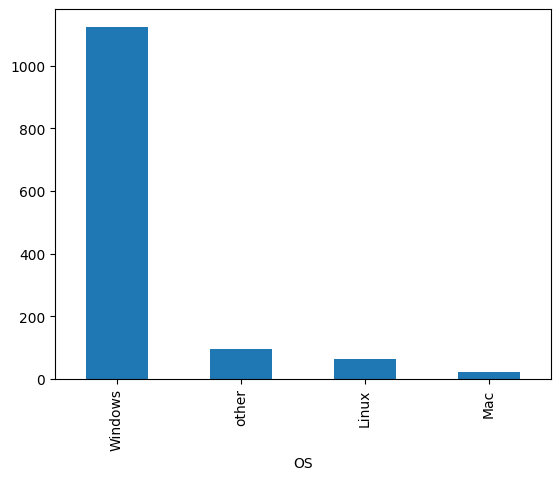

In [89]:
df.OS.value_counts().plot(kind="bar")

<Axes: xlabel='OS', ylabel='Price'>

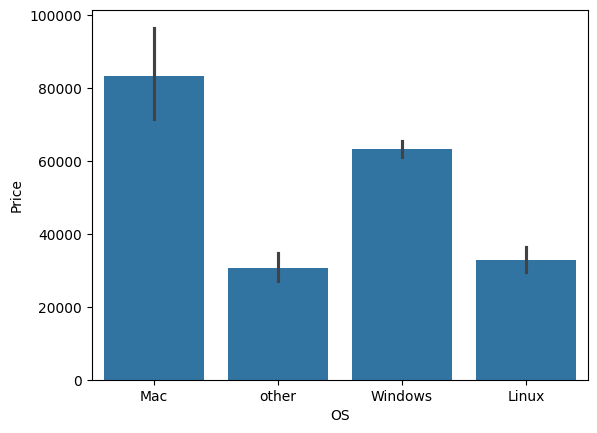

In [90]:
sns.barplot(x=df["OS"],y=df["Price"])

In [91]:
df.drop(columns="OpSys",inplace=True)

In [92]:
df.head()

,Company,TypeName,Ram,Weight,Price,touch_screen,Ips,Ppi,cpu brand,HDD,SSD,Graphic,OS
0,Apple,Ultrabook,8,1.37,71378,0,1,350523.076923,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895,0,0,110907.692308,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636,0,0,161760.000000,Intel Core i5,0,256,Intel,other
3,Apple,Ultrabook,16,1.83,135195,0,1,384480.000000,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095,0,1,350523.076923,Intel Core i5,0,256,Intel,Mac


<ipython-input-93-1ea92dbb7546>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Weight"])


<Axes: xlabel='Weight', ylabel='Density'>

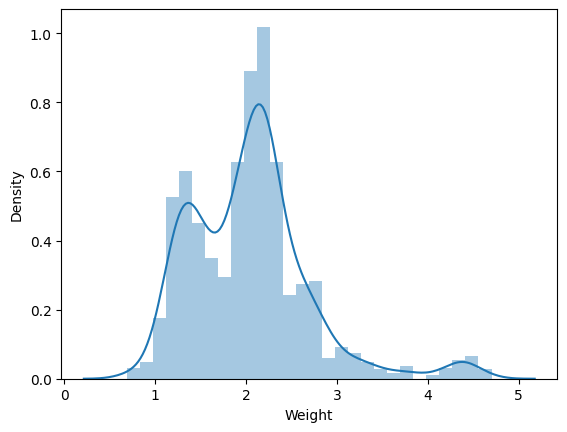

In [93]:
sns.distplot(df["Weight"])

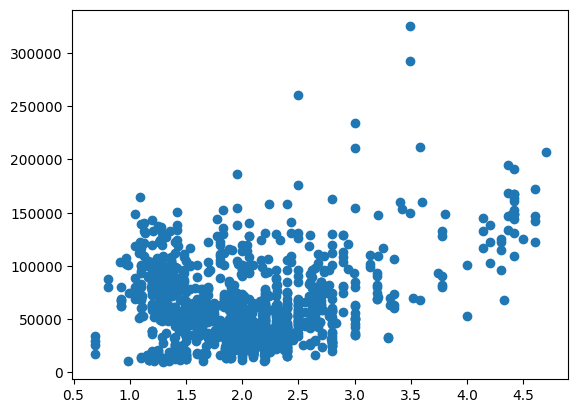

In [94]:
plt.scatter(df["Weight"],df["Price"])

In [95]:
df.corr(numeric_only=True)

,Ram,Weight,Price,touch_screen,Ips,Ppi,HDD,SSD
Ram,1.000000,0.383362,0.742905,0.118875,0.207949,0.340779,0.095808,0.603379
Weight,0.383362,1.000000,0.209867,-0.293004,0.018643,-0.167665,0.514147,-0.063818
Price,0.742905,0.209867,1.000000,0.192917,0.253319,0.475969,-0.096892,0.670660
touch_screen,0.118875,-0.293004,0.192917,1.000000,0.148026,0.410295,-0.208766,0.257577
Ips,0.207949,0.018643,0.253319,0.148026,1.000000,0.251555,-0.093588,0.225311
Ppi,0.340779,-0.167665,0.475969,0.410295,0.251555,1.000000,-0.183691,0.481022
HDD,0.095808,0.514147,-0.096892,-0.208766,-0.093588,-0.183691,1.000000,-0.400750
SSD,0.603379,-0.063818,0.670660,0.257577,0.225311,0.481022,-0.400750,1.000000


<Axes: >

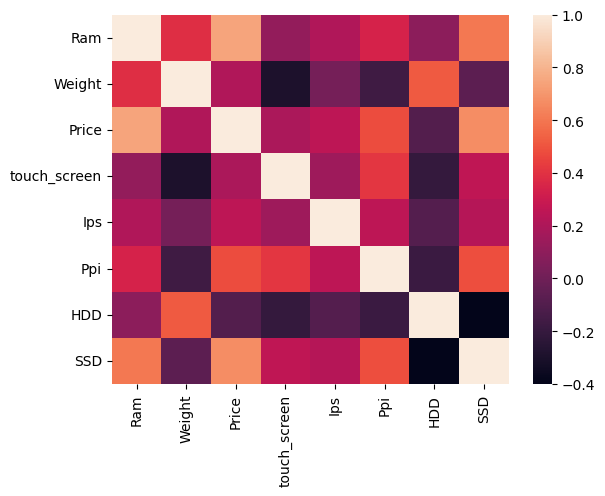

In [96]:
sns.heatmap(df.corr(numeric_only=True))

In [98]:
df.corr(numeric_only=True)["Price"].sort_values(ascending=False)

,Price
Price,1.000000
Ram,0.742905
SSD,0.670660
Ppi,0.475969
Ips,0.253319
Weight,0.209867
touch_screen,0.192917
HDD,-0.096892


In [99]:


df["Ppi"] = df["Ppi"].astype("int")

## **Model Building**

In [100]:
x = df.drop(columns = "Price")
y = np.log(df["Price"])

In [101]:
x

,Company,TypeName,Ram,Weight,touch_screen,Ips,Ppi,cpu brand,HDD,SSD,Graphic,OS
0,Apple,Ultrabook,8,1.37,0,1,350523,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,110907,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,161760,Intel Core i5,0,256,Intel,other
3,Apple,Ultrabook,16,1.83,0,1,384480,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,350523,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,1,1,173314,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,1,1,518461,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2,1.50,0,0,87706,other Intel processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,0,0,81859,Intel Core i7,1000,0,AMD,Windows


In [102]:
y

,Price
0,11.175745
1,10.776766
2,10.329931
3,11.814473
4,11.473093
...,...
1298,10.433880
1299,11.288106
1300,9.409273
1301,10.614106


In [103]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [104]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error,accuracy_score

In [105]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

## **Linear Regression**

In [107]:
# Creating pipline

# creating step  apply encoding on all non numerical column at a time and remaining column pass through same
step1 = ColumnTransformer(transformers=[
        ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])]
        ,remainder='passthrough')

# selecting algorithm
step2 = LinearRegression()

pipe = Pipeline([("step1",step1),("step2",step2)])

pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)

print("r2 score : ",r2_score(y_test,y_pred))
print("MAE : ",mean_absolute_error(y_test,y_pred))
# print("accuracy score : ",accuracy_score(y_test,y_pred))

r2 score :  0.8043416746900497
MAE :  0.21586232860309526


## **Ridge Regression**

In [108]:
# Creating pipline

# creating step  apply encoding on all non numerical column at a time and remaining column pass through same
step1 = ColumnTransformer(transformers=[
        ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])]
        ,remainder='passthrough')

# selecting algorithm
step2 = Ridge(alpha = 10)

pipe = Pipeline([("step1",step1),("step2",step2)])

pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)

print("r2 score : ",r2_score(y_test,y_pred))
print("MAE : ",mean_absolute_error(y_test,y_pred))
# print("accuracy score : ",accuracy_score(y_test,y_pred))

r2 score :  0.7978945059250065
MAE :  0.2209364812001361


## **Lasso**

In [109]:
# Creating pipline

# creating step  apply encoding on all non numerical column at a time and remaining column pass through same
step1 = ColumnTransformer(transformers=[
        ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])]
        ,remainder='passthrough')

# selecting algorithm
step2 = Lasso(alpha = 0.001)

pipe = Pipeline([("step1",step1),("step2",step2)])

pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)

print("r2 score : ",r2_score(y_test,y_pred))
print("MAE : ",mean_absolute_error(y_test,y_pred))
# print("accuracy score : ",accuracy_score(y_test,y_pred))

r2 score :  0.8015523711461464
MAE :  0.2183422328928455


## **Decision Tree**

In [111]:
# Creating pipline

# creating step  apply encoding on all non numerical column at a time and remaining column pass through same
step1 = ColumnTransformer(transformers=[
        ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])]
        ,remainder='passthrough')

# selecting algorithm
step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([("step1",step1),("step2",step2)])

pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)

print("r2 score : ",r2_score(y_test,y_pred))
print("MAE : ",mean_absolute_error(y_test,y_pred))
# print("accuracy score : ",accuracy_score(y_test,y_pred))

r2 score :  0.8347379770002759
MAE :  0.19208422008353368


## **SVM**

In [112]:
# Creating pipline

# creating step  apply encoding on all non numerical column at a time and remaining column pass through same
step1 = ColumnTransformer(transformers=[
        ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])]
        ,remainder='passthrough')

# selecting algorithm
step2 = SVR(C=10000,epsilon=0.1,kernel="rbf")

pipe = Pipeline([("step1",step1),("step2",step2)])

pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)

print("r2 score : ",r2_score(y_test,y_pred))
print("MAE : ",mean_absolute_error(y_test,y_pred))
# print("accuracy score : ",accuracy_score(y_test,y_pred))

r2 score :  0.5522464213522601
MAE :  0.3319478366043251


## **KNeighbors**

In [113]:
# Creating pipline

# creating step  apply encoding on all non numerical column at a time and remaining column pass through same
step1 = ColumnTransformer(transformers=[
        ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])]
        ,remainder='passthrough')

# selecting class
step2 = KNeighborsRegressor(n_neighbors=3)

pipe = Pipeline([("step1",step1),("step2",step2)])

pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)

print("r2 score : ",r2_score(y_test,y_pred))
print("MAE : ",mean_absolute_error(y_test,y_pred))
# print("accuracy score : ",accuracy_score(y_test,y_pred))

r2 score :  0.7612324901156757
MAE :  0.22700639145520957


## **RandomForest**

In [114]:
# Creating pipline

# creating step  apply encoding on all non numerical column at a time and remaining column pass through same
step1 = ColumnTransformer(transformers=[
        ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])]
        ,remainder='passthrough')

# selecting class
step2 = RandomForestRegressor(max_depth=15,
                              n_estimators=100,
                              max_samples=0.5,
                              max_features=0.75,
                              random_state=3)

pipe = Pipeline([("step1",step1),("step2",step2)])

pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)

print("r2 score : ",r2_score(y_test,y_pred))
print("MAE : ",mean_absolute_error(y_test,y_pred))
# print("accuracy score : ",accuracy_score(y_test,y_pred))

r2 score :  0.8652364163045012
MAE :  0.1739306091441215


## **Adaboost**

In [115]:
# Creating pipline

# creating step  apply encoding on all non numerical column at a time and remaining column pass through same
step1 = ColumnTransformer(transformers=[
        ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])]
        ,remainder='passthrough')

# selecting class
step2 = AdaBoostRegressor(n_estimators=15,learning_rate = 0.1)

pipe = Pipeline([("step1",step1),("step2",step2)])

pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)

print("r2 score : ",r2_score(y_test,y_pred))
print("MAE : ",mean_absolute_error(y_test,y_pred))
# print("accuracy score : ",accuracy_score(y_test,y_pred))

r2 score :  0.7106187249895647
MAE :  0.2746800951483874


## **Gradientboost**

In [116]:
# Creating pipline

# creating step  apply encoding on all non numerical column at a time and remaining column pass through same
step1 = ColumnTransformer(transformers=[
        ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])]
        ,remainder='passthrough')

# selecting class
step2 = GradientBoostingRegressor(n_estimators=500)

pipe = Pipeline([("step1",step1),("step2",step2)])

pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)

print("r2 score : ",r2_score(y_test,y_pred))
print("MAE : ",mean_absolute_error(y_test,y_pred))
# print("accuracy score : ",accuracy_score(y_test,y_pred))

r2 score :  0.8727887445781426
MAE :  0.16852676957998666


- the maximum r2 score is find in gradientboosting algorithm so i should use it

In [117]:
import pickle as pkl

pkl.dump(pipe,open("pipe.pkl","wb"))
pkl.dump(df,open("df.pkl","wb"))

In [118]:
x_train.head()

,Company,TypeName,Ram,Weight,touch_screen,Ips,Ppi,cpu brand,HDD,SSD,Graphic,OS
147,Asus,Notebook,4,2.00,0,0,161760,other Intel processor,1000,0,Intel,Windows
342,HP,Notebook,8,2.10,0,1,161760,Intel Core i3,1000,0,Nvidia,Windows
1003,HP,Notebook,4,1.64,0,0,87706,Intel Core i5,500,0,Intel,Windows
814,Dell,Notebook,8,2.18,0,0,161760,Intel Core i5,0,256,AMD,Windows
344,Dell,Ultrabook,8,1.20,0,0,186646,Intel Core i7,0,256,Intel,Windows
